<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
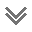

In [1]:
# Import the necessary packages
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import lxml

# Specify the URL
url = 'https://www.worldometers.info/coronavirus/'

# Access the URL
page = requests.get(url)
if page.status_code == 200:
    html_doc = page.text

soup = BeautifulSoup(html_doc)

print(soup.prettify())

In [6]:
# Navigate to the website and determine the table ID.
# Extract the contents of the table with the table id.
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [7]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>552,813,562</td>
 <td

In [11]:
# Store the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# Create an output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '552,813,562',
  'Total Deaths': '+166,981',
  'New Deaths': '6,358,293',
  'Total Recovered': '+320',
  'New Recovered': '528,032,388',
  'Active Cases': '+181,140',
  'Serious, Critical': '18,422,881',
  'Tot Cases/ 1M pop': '36,824',
  'Deaths/ 1M pop': '70,921',
  'Total Tests': '815.7',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '89,360,080',
  'Total Deaths': '',
  'New Deaths': '1,042,678 ',
  'Total Recovered': '',
  'New Recovered': '84,916,391',
  'Active Cases': '',
  'Serious, Critical': '3,401,011',
  'Tot Cases/ 1M pop': '3,333',
  'Deaths/ 1M pop': '266,853',
  'Total Tests': '3,114',
  'Tests/ 1M pop': '1,051,356,478',
  'Population': '3,139,630'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,471,282',
  'Total Deaths': '',
  'New Deaths': '525,139 ',
  'Total Recovered': '',
  'New Recovered': '42,836,906',
  'Active Ca

In [12]:
data = pd.DataFrame(output)

print(data.head())

  Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  552,813,562     +166,981   6,358,293   
1             1         USA   89,360,080               1,042,678    
2             2       India   43,471,282                 525,139    
3             3      Brazil   32,358,451                 671,466    
4             4      France   31,083,859                 149,533    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +320   528,032,388     +181,140        18,422,881   
1                    84,916,391                      3,401,011   
2                    42,836,906                        109,237   
3                    30,846,850                        840,135   
4                    29,620,989                      1,313,337   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,824         70,921       815.7                            
1             3,333        266,853    

In [15]:
data_file = 'Covid_country_data.csv'

data.to_csv(data_file, index=False)
print('Success!')

Success!
